A) Los siguientes datos fueron extraidos de un [perfil real de Instragram](https://www.instagram.com/paulacano24/):

https://raw.githubusercontent.com/restrepo/ComputationalMethods/master/data/Followers.json

Interprete los datos como un problema de caida libre y a partir del ajuste (fit) a la correspondiente ecuación de movimiento, determine
1. La velocidad inicial de incremento de seguidores en `followers/hour`
1. La aceleración constante en `followers/hour**2`
1. El número máximo de seguidores que alcanzaría el perfil
1. La fecha en la que se alcanzaría dicho máximo

B) El período de  un pendulo de longitud $l$ oscilando a ángulos grandes  $\alpha$, está dado por
$$
T=T_{0} \frac{\sqrt{2}}{\pi} \int_{0}^{\alpha} \frac{d \theta}{(\cos \theta-\cos \alpha)^{\frac{1}{2}}}
$$
donde
$$
T_{0}=2 \pi \sqrt{\frac{l}{g}}
$$
es el período del mismo péndulo a pequeñas amplitudes. Culquier intento de evaluación numérico de esa integral debería fallar. Sin embargo, si hacemos el cambio de variable
$$
\sin \frac{\theta}{2}=\sin \frac{\alpha}{2} \sin \phi
$$
obtenemos
$$
T=\frac{2 T_{0}}{\pi} \int_{0}^{\frac{\pi}{2}} \frac{d \phi}{\left(1-\sin ^{2} \frac{\alpha}{2} \sin ^{2} \phi\right)^{\frac{1}{2}}}
$$
que corresponde a una integral bien comportada. 
1. Escriba un programa que use la anterio integral para calcular el cociente  $T/T_0$ para ángulos enteros (en grados) $0^\circ \le\alpha \le 90^\circ$.  
1. Genere un DataFrame de pandas que contenga como columnas: la amplitud en grados, la amplitud en radianes, y el cociente $T/T_0$, 
1. Haga un gráfico de $T/T_0$ como función de $\alpha$ (en grados). 
1. Explain the result when $\alpha = 0.$ 

In [233]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from scipy import integrate

In [234]:
#a)
df = pd.read_json("https://raw.githubusercontent.com/restrepo/ComputationalMethods/master/data/Followers.json")
df

,followers,date_time,hours
0,42696,2021-08-04 22:06:53.668,0.000000
1,42706,2021-08-04 23:06:56.517,1.000791
2,42716,2021-08-05 00:06:59.505,2.001621
3,42734,2021-08-05 01:07:02.174,3.002363
4,42749,2021-08-05 02:07:04.854,4.003107
...,...,...,...
615,47452,2021-09-02 12:29:21.834,686.374491
616,47486,2021-09-02 19:59:32.801,693.877537
617,47491,2021-09-02 20:59:50.542,694.882465
618,47493,2021-09-02 21:59:59.345,695.884910


In [235]:
P = np.polyfit(df["hours"], df["followers"], 2)
P1 = np.poly1d([P[0], P[1], P[2]])
print(f"Polinomio : \n {P1}")

v_0 = P[1] #Velocidad inicial
a_0 = P[0]*2 #aceleracion inicial 
seguidores_max = max(df["followers"]) # seguidores maximos 


Polinomio : 
            2
-0.002438 x + 8.552 x + 4.276e+04


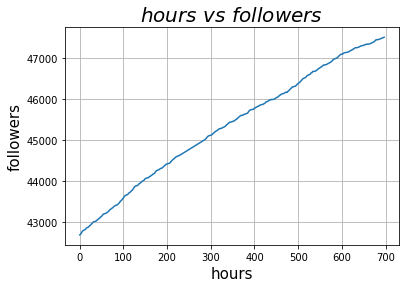

In [236]:
plt.plot(df["hours"], df["followers"])
plt.title("$hours \ vs \ followers$", size = 20)
plt.xlabel("hours", size = 15)
plt.ylabel("followers", size = 15)
plt.grid()

In [237]:
dP = P1.deriv() # Derivada del polinomio 
print(dP) # Polinomio derivado
np.max(dP) # la velocidad
print(dP.roots) # Tiempo en que se alcanza el maximo
print(np.max(P1(dP.roots))) # es el numero maximo de followwers que obtendra

 
-0.004875 x + 8.552
[1754.19313857]
50262.136729011865


In [238]:
x = df["date_time"].values.astype(float)
coef = np.polyfit(x, df["followers"], 2)
poly = np.poly1d([coef[0], coef[1], coef[2]])
fech = poly.deriv().roots #la fecha en flotante
pd.to_datetime(fech) # fecha en la cual conseguira el maximo de followers

DatetimeIndex(['2021-10-17 00:18:28.965938432'], dtype='datetime64[ns]', freq=None)

B) El período de  un pendulo de longitud $l$ oscilando a ángulos grandes  $\alpha$, está dado por
$$
T=T_{0} \frac{\sqrt{2}}{\pi} \int_{0}^{\alpha} \frac{d \theta}{(\cos \theta-\cos \alpha)^{\frac{1}{2}}}
$$
donde
$$
T_{0}=2 \pi \sqrt{\frac{l}{g}}
$$
es el período del mismo péndulo a pequeñas amplitudes. Culquier intento de evaluación numérico de esa integral debería fallar. Sin embargo, si hacemos el cambio de variable
$$
\sin \frac{\theta}{2}=\sin \frac{\alpha}{2} \sin \phi
$$
obtenemos
$$
T=\frac{2 T_{0}}{\pi} \int_{0}^{\frac{\pi}{2}} \frac{d \phi}{\left(1-\sin ^{2} \frac{\alpha}{2} \sin ^{2} \phi\right)^{\frac{1}{2}}}
$$
que corresponde a una integral bien comportada. 
1. Escriba un programa que use la anterio integral para calcular el cociente  $T/T_0$ para ángulos enteros (en grados) $0^\circ \le\alpha \le 90^\circ$.  
1. Genere un DataFrame de pandas que contenga como columnas: la amplitud en grados, la amplitud en radianes, y el cociente $T/T_0$, 
1. Haga un gráfico de $T/T_0$ como función de $\alpha$ (en grados). 
1. Explain the result when $\alpha = 0.$ 

In [239]:
#B) 1) 
alpha = np.arange(0 , 91, 1) #alpha en grados 
alpha1 = np.deg2rad(alpha)
def f(phi, alpha1):
  return 1/(1 - ((np.sin(alpha1/2))**2) * (np.sin(phi))**2)**(0.5)


integral = np.vectorize(integrate.quad)
integral = integral(f, 0, np.pi/2, args = (alpha1)) #los valores de la integral en una tupla
integral = np.array(integral)
T_T0 = (2/np.pi) * integral[0] #multiplicar lo por los valores, y no por el error 
T_T0

array([1.        , 1.00001904, 1.00007616, 1.00017137, 1.0003047 ,
       1.00047617, 1.00068582, 1.00093369, 1.00121983, 1.00154431,
       1.00190719, 1.00230855, 1.00274847, 1.00322704, 1.00374438,
       1.00430058, 1.00489577, 1.00553006, 1.00620361, 1.00691655,
       1.00766903, 1.00846121, 1.00929327, 1.01016539, 1.01107775,
       1.01203055, 1.013024  , 1.01405832, 1.01513373, 1.01625048,
       1.0174088 , 1.01860895, 1.01985121, 1.02113584, 1.02246314,
       1.02383341, 1.02524696, 1.0267041 , 1.02820518, 1.02975053,
       1.03134052, 1.03297551, 1.03465589, 1.03638204, 1.03815439,
       1.03997334, 1.04183934, 1.04375283, 1.04571428, 1.04772416,
       1.04978296, 1.0518912 , 1.0540494 , 1.0562581 , 1.05851786,
       1.06082924, 1.06319285, 1.06560929, 1.0680792 , 1.07060321,
       1.07318201, 1.07581626, 1.0785067 , 1.08125403, 1.08405903,
       1.08692245, 1.08984511, 1.09282782, 1.09587144, 1.09897683,
       1.10214491, 1.10537659, 1.10867285, 1.11203465, 1.11546

In [240]:
#2) 
dicc = {"Amplitud_Grados" : alpha, "Amplitud_Radianes" : alpha1, "T/T0" : T_T0}
df = pd.DataFrame.from_dict(dicc)
df 

,Amplitud_Grados,Amplitud_Radianes,T/T0
0,0,0.000000,1.000000
1,1,0.017453,1.000019
2,2,0.034907,1.000076
3,3,0.052360,1.000171
4,4,0.069813,1.000305
...,...,...,...
86,86,1.500983,1.162214
87,87,1.518436,1.166617
88,88,1.535890,1.171105
89,89,1.553343,1.175679


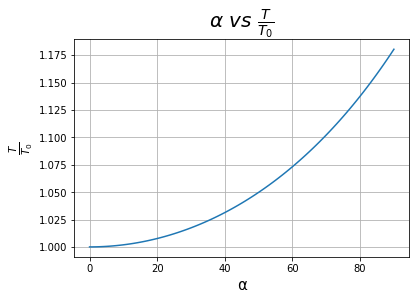

In [241]:
# 3)
plt.plot(alpha, T_T0) 
plt.title(r"$α \ vs \ \frac{T}{T_{0}}$", size = 20)
plt.xlabel("α", size = 15)
plt.ylabel(r"$\frac{T}{T_{0}}$", size = 15)
plt.grid()

In [242]:
T_T0[0] # cuando alpha == 0, tenemos que el resultado es T/T0 = 1

1.0

Para la ecuacion
$$
T=\frac{2 T_{0}}{\pi} \int_{0}^{\frac{\pi}{2}} \frac{d \phi}{\left(1-\sin ^{2} \frac{\alpha}{2} \sin ^{2} \phi\right)^{\frac{1}{2}}}
\\\\
$$
Ahora hacemos $\alpha$ = 0
$$
T = \frac{2 T_{0}}{\pi} \int_{0}^{\frac{\pi}{2}} \frac{d \phi}{\left(1-\sin ^{2} \frac{0}{2} \sin ^{2} \phi\right)^{\frac{1}{2}}} = \frac{2 T_{0}}{\pi} \int_{0}^{\frac{\pi}{2}} \frac{d \phi}{1} = (\frac{2 T_{0}}{\pi}) (\frac{2}{\pi}) = T_{0} 
$$
Por lo anterior obtenemos que
$$
T = T_{0} $$ Asi $$ \frac{T}{T_{0}} = 1
$$ 
